In [4]:
!pip install opensmile --quiet
!pip install -q gdown

In [39]:
import os
import tarfile
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import librosa
import librosa.display
from IPython.display import Audio, display

### Helper Functions

In [35]:
def count_files(directory):
    """
    Count the number of files in the specified directory.

    Parameters:
    directory (str): Path to the directory.

    Returns:
    int: Number of files in the directory.
    """
    # List all entries in the directory and filter to count only files
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return len(files)


def plot_waveform(file_path=None, folder=Path('ADReSSo21/diagnosis/train/audio/ad')):
    """
    Plots the waveform of an audio file.

    Parameters:
        file_path (str or Path, optional): Path to the audio file.
            If None, the first .wav file found in the 'folder' is used.
        folder (Path): Directory to search for .wav files if file_path is not provided.
    """
    # If no specific file is provided, use the first .wav file in the given folder.
    if file_path is None:
        wav_files = list(folder.glob("*.wav"))
        if not wav_files:
            print(f"No .wav files found in {folder}")
            return
        file_path = wav_files[0]
    else:
        file_path = Path(file_path)

    # Load the audio file
    waveform, sr = librosa.load(str(file_path), sr=None)

    # Print waveform details
    print("Waveform Shape:", waveform.shape)
    print("Sampling Rate:", sr)
    duration = len(waveform) / sr
    print("Duration (seconds):", duration)
    print("")

    # Extract the file name for the plot title
    file_name = os.path.basename(file_path)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(waveform, sr=sr)
    plt.title(f"Waveform: {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


### Accessing Dataset

In [7]:
!gdown 1p4ZQOwbHkD2RAvq2K5ekY5gcMi24XLnS

tarball_filename = "ADReSSo21-diagnosis-train.tar"

# Extract all contents from the tarball into the current working directory
with tarfile.open(tarball_filename, 'r:*') as tar:
    tar.extractall(path="./")

# Remove the tarball after extraction
os.remove(tarball_filename)

Downloading...
From (original): https://drive.google.com/uc?id=1p4ZQOwbHkD2RAvq2K5ekY5gcMi24XLnS
From (redirected): https://drive.google.com/uc?id=1p4ZQOwbHkD2RAvq2K5ekY5gcMi24XLnS&confirm=t&uuid=1d16c14e-d705-4fbe-85d1-e21b46b77ec3
To: /content/ADReSSo21-diagnosis-train.tar
100% 1.75G/1.75G [00:13<00:00, 134MB/s]
Extraction complete. Files are extracted into: /content


In [30]:
# Define the base dataset directory
dataset_dir = Path('ADReSSo21/diagnosis/train')

# Dynamically build directory paths using pathlib
paths = {
    'audio': dataset_dir / 'audio',
    'audio_ad': dataset_dir / 'audio' / 'ad',
    'audio_cn': dataset_dir / 'audio' / 'cn',
    'segmentation': dataset_dir / 'segmentation',
    'segmentation_ad': dataset_dir / 'segmentation' / 'ad',
    'segmentation_cn': dataset_dir / 'segmentation' / 'cn'
}

### Data Analysis

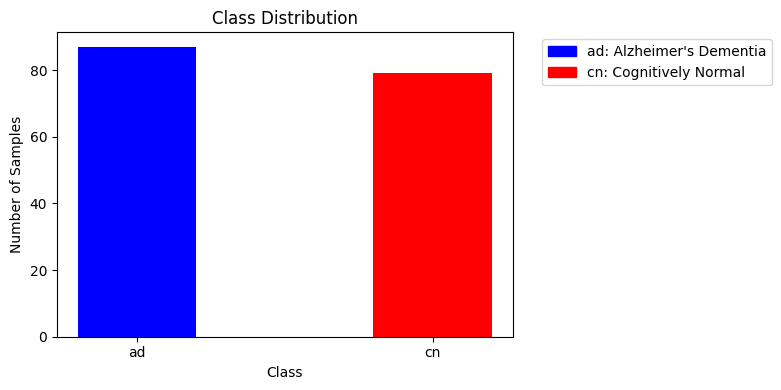

In [34]:
# Count the files in each audio directory for analysis
ad_count = count_files(str(paths['audio_ad']))
cn_count = count_files(str(paths['audio_cn']))

# Prepare data for plotting
classes = ['ad', 'cn']
counts = [ad_count, cn_count]
colors = ['blue', 'red']

# Create the bar chart with a smaller width for each bar
plt.figure(figsize=(8, 4))
bar_width = 0.4
plt.bar(classes, counts, color=colors, width=bar_width)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')

# Create legend handles
legend_handles = [
    mpatches.Patch(color='blue', label="ad: Alzheimer's Dementia"),
    mpatches.Patch(color='red', label="cn: Cognitively Normal")
]

# Place the legend outside the plot area on the top right
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to accommodate the legend outside the plot area
plt.show()

Waveform Shape: (2030896,)
Sampling Rate: 44100
Duration (seconds): 46.05206349206349



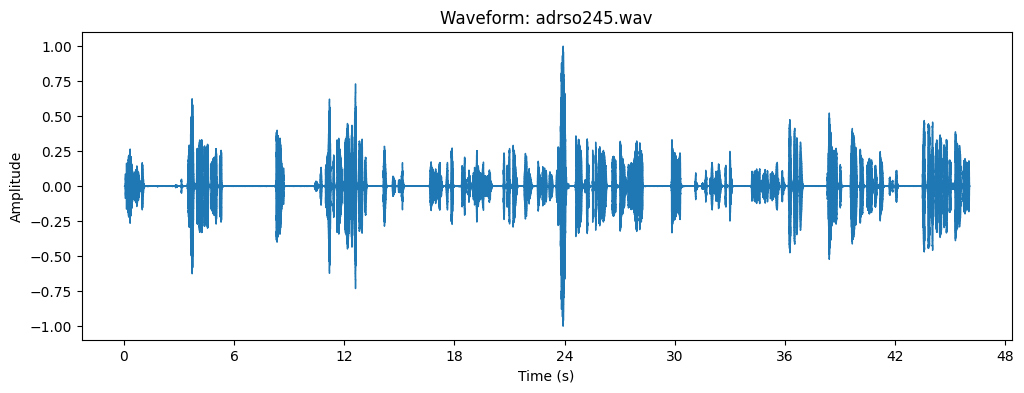

In [37]:
# Retrieve the first .wav file from the 'audio_ad' directory
first_audio_file = next(paths['audio_ad'].glob("*.wav"), None)

plot_waveform(file_path=first_audio_file)

In [40]:
display(Audio(str(first_audio_file)))